In [16]:
#indep factors: u, c, outside temp
#dep factors: inside temp

import pandas as pd
import numpy as np

df = pd.read_excel("q1spreadsheet (1).xlsx")
dates = pd.date_range("00:00", "23:00", freq = "1h").time
df["time"] = np.tile(dates, 4)
df["time_numeric"] = df["time"].apply(lambda t: t.hour * 3600 + t.minute * 60)

print(df.head())

X = df[['Outdoor Temp', 'U-Value', "C-Value", "time_numeric"]]
y = df["Indoor Temp"]

   Outdoor Temp   U-Value      C-Value  Indoor Temp      time  time_numeric
0          29.4  0.083333  14965.91808      25.6481  00:00:00             0
1          29.4  0.083333  14965.91808      25.7383  01:00:00          3600
2          28.9  0.083333  14965.91808      25.8144  02:00:00          7200
3          28.3  0.083333  14965.91808      25.8742  03:00:00         10800
4          28.3  0.083333  14965.91808      25.9325  04:00:00         14400


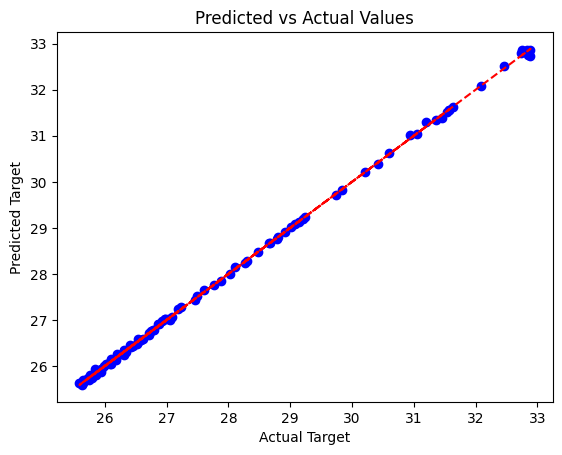

In [19]:
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)
# regr = linear_model.LinearRegression()
# regr.fit(X, y)

y_pred = model.predict(X_poly)

plt.scatter(y, y_pred, color="blue")
plt.plot(y, y, color="red", linestyle="--")  # Perfect fit line
plt.xlabel("Actual Target")
plt.ylabel("Predicted Target")
plt.title("Predicted vs Actual Values")
plt.show()